A calibration spectrum was collected on a XXX detector from YYY. Six sources were used to generate this spectrum: $^{228}$Th, $^{133}$Ba, $^{241}$Am, $^{137}$Cs, $^{152}$Eu, and $^{60}$Co. For more information of these sources, see `data/sources.txt`. The sources were placed at a standoff distance of approximately 1 meter in order to eliminate any coincident effects. This data was collected over 3 days from January 11 to 14, 2019. Read in and plot the spectrum below:

In [1]:
#Import Statements
from utilities import *
from IPython.display import Image
import os
import numpy
numpy.random.seed(0)
from math import exp, sqrt
from math import log as ln

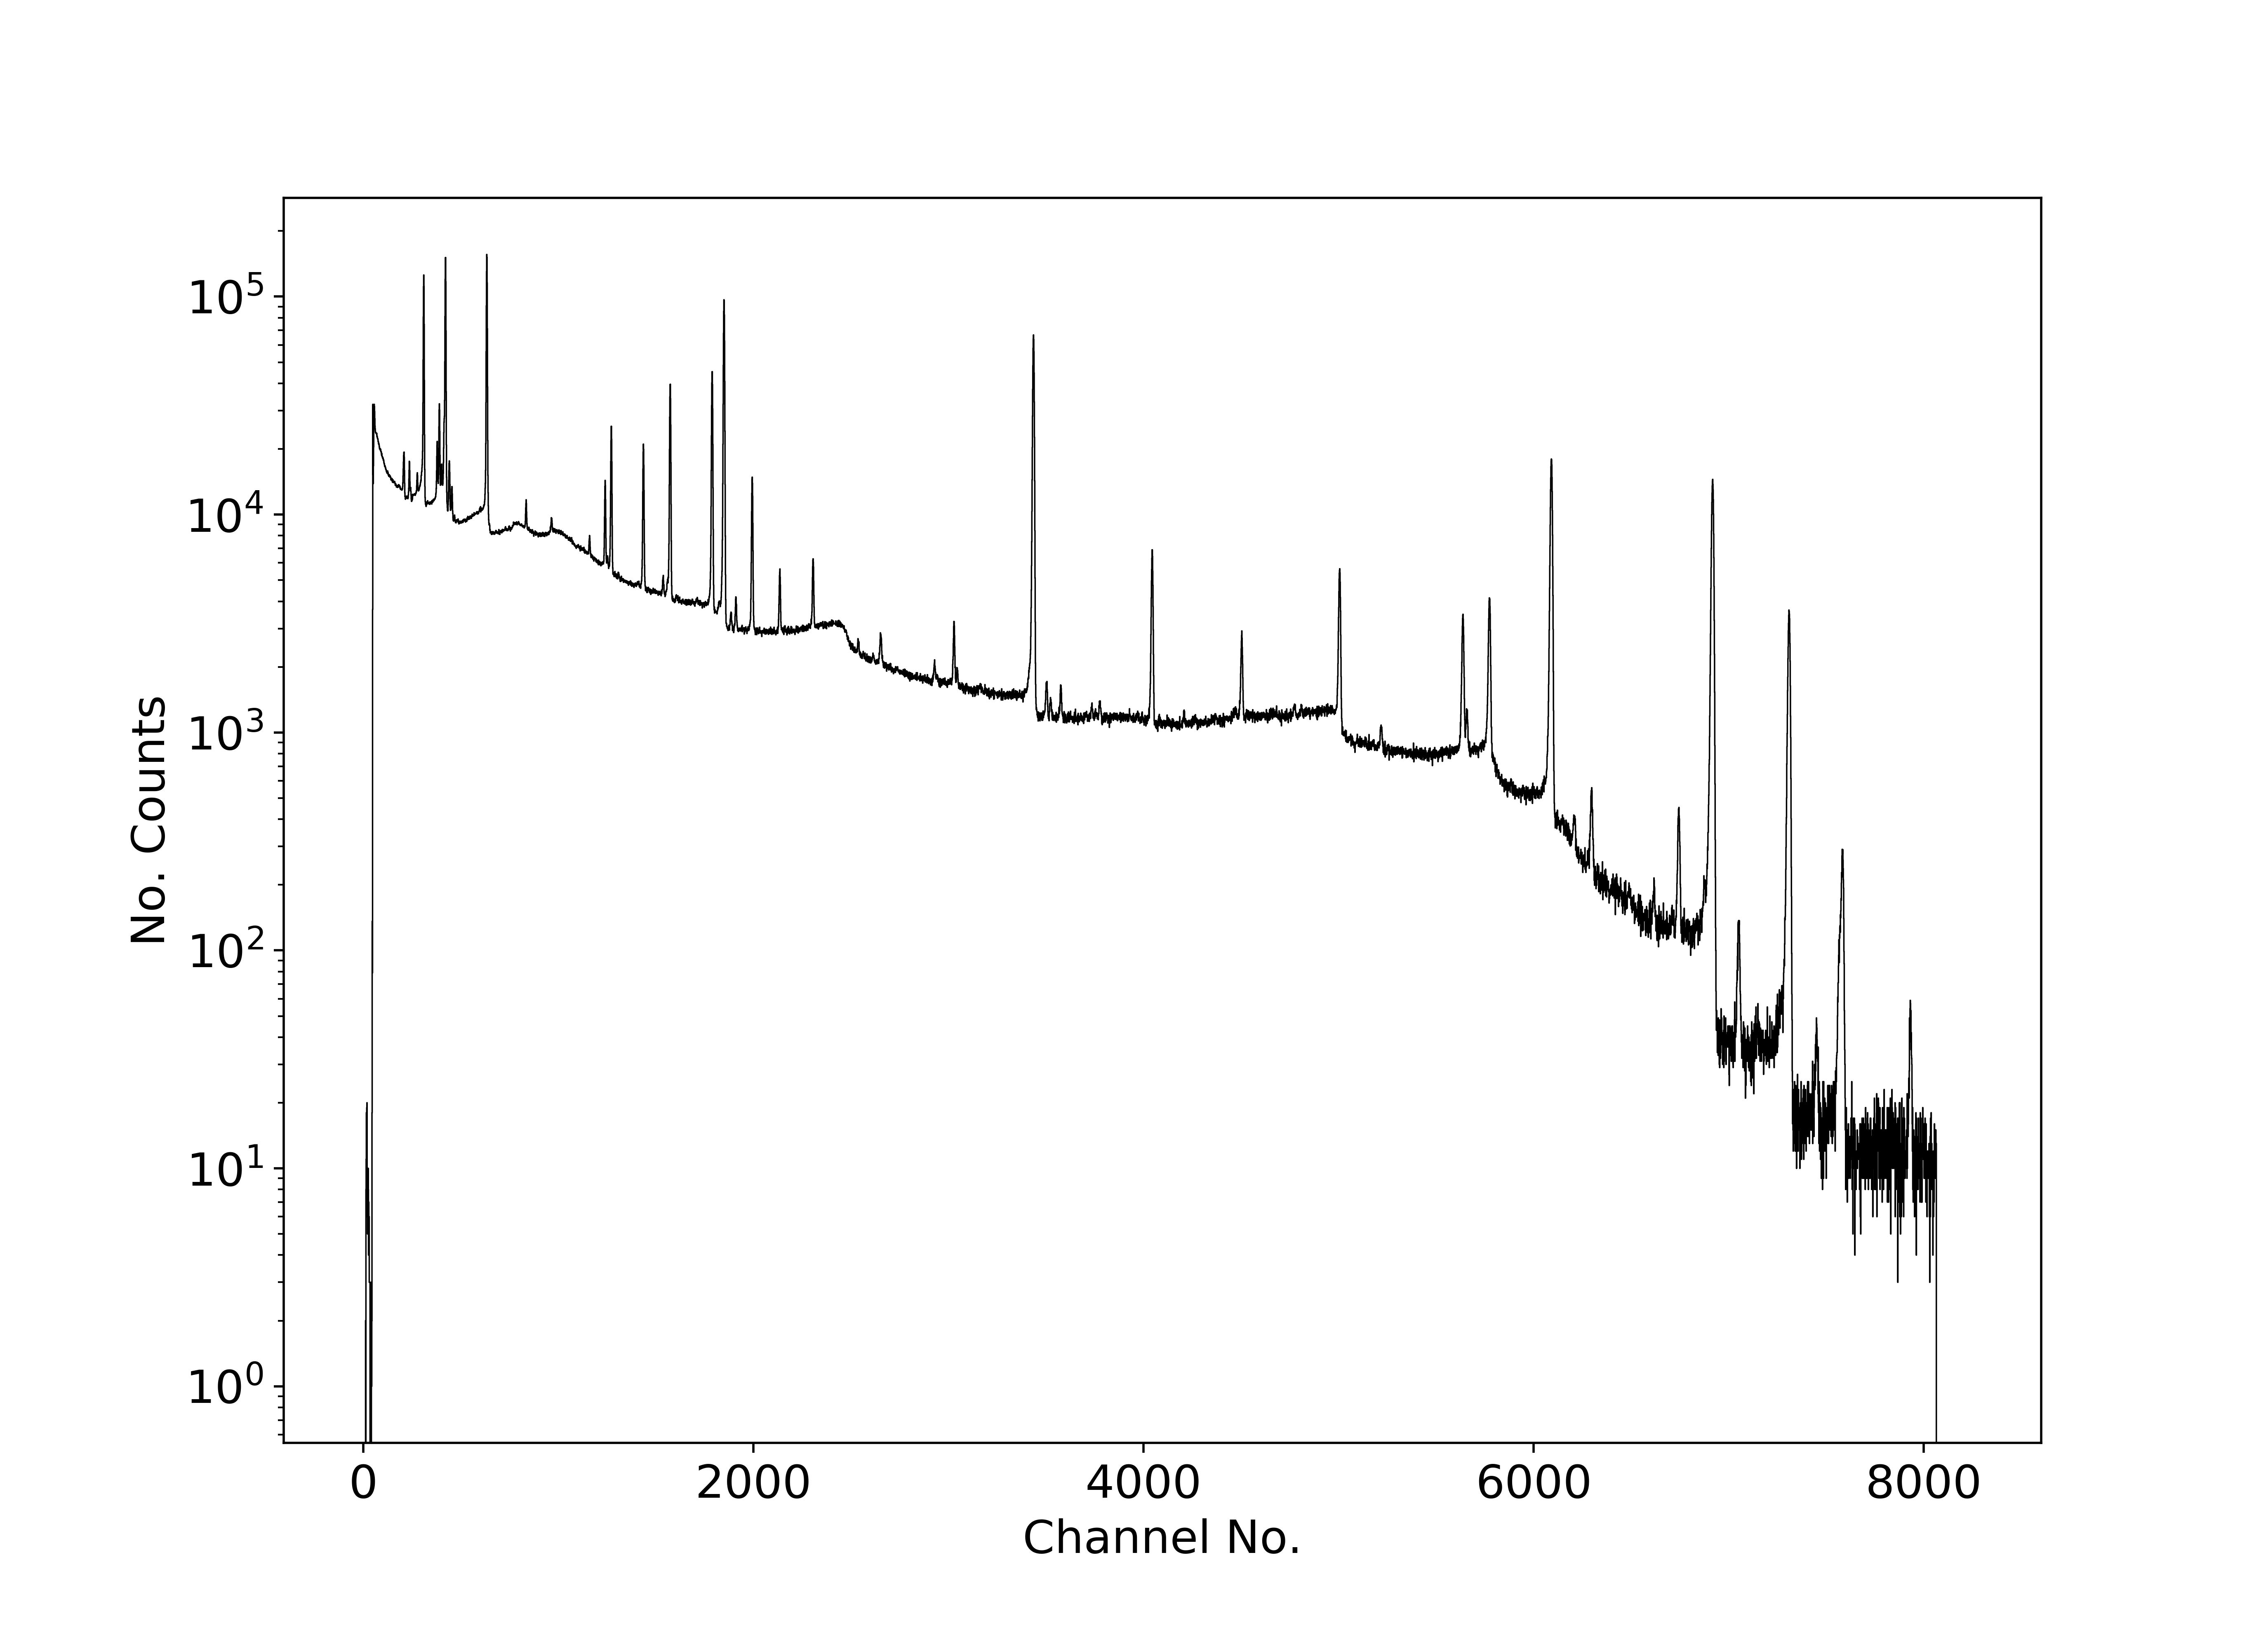

<Figure size 792x576 with 0 Axes>

In [2]:
file = open('../data/eu152_1_14_2019.Spe','r')
lines = file.readlines()
file.close()
data = [float(i) for i in lines[12:12+8192]]

plot_spectrum(data, display=False, file_out='../images/uncalibrated_spectrum.eps', logscale=True)
plot_spectrum(data, display=False, file_out='../images/uncalibrated_spectrum.png', fmt='png', logscale=True)
Image('../images/uncalibrated_spectrum.png')

The following gamma rays were identified:

| Source       | Energy (keV)  |
|--------------|---------------|
| $^{241}$Am   | 59.5409(1)    |
| $^{152}$Eu   | 121.7817(3)   |
| $^{212}$Pb*  | 238.632(2)    |
| $^{152}$Eu   | 244.6974(8)   |
| $^{133}$Ba   | 276.3989(12)  |
| $^{133}$Ba   | 302.0129(5)   |
| $^{152}$Eu   | 344.2785(12)  |
| $^{133}$Ba   | 356.0192(7)   |
| $^{133}$Ba   | 383.8485(12)  |
| $^{152}$Eu   | 411.1165(12)  |
| $^{152}$Eu   | 443.9606(16)  |
| $^{152}$Eu   | 563.986(5)    |
| $^{208}$Tl*  | 583.187(2)    |
| $^{152}$Eu^  | 586.2648(26)  |
| $^{137}$Cs   | 661.657(3)    |
| $^{152}$Eu   | 778.9045(24)  |
| $^{152}$Eu   | 867.380(3)    |
| $^{152}$Eu   | 964.057(5)    |
| $^{152}$Eu   | 1085.837(10)  |
| $^{152}$Eu   | 1089.737(5)   |
| $^{152}$Eu   | 1112.076(3)   |
| $^{60}$Co    | 1173.228(3)   |
| $^{152}$Eu   | 1212.948(11)  |
| $^{152}$Eu   | 1299.142(8)   |
| $^{60}$Co    | 1332.492(4)   |
| $^{152}$Eu   | 1408.013(3)   |
| $^{152}$Eu   | 1528.10(4)    |

*Background gamma from $^{232}$Th.

^Eliminated from efficiency calculations do to contamination from $^{208}$Tl photopeak. 


The gamma rays from the $^{228}$Th source were not able to be distinguished from X-rays resulting from the Pb shielding. 

Now identify windows around each photopeak of interest in order to perform a fit:

In [3]:
energies     = [   59.5409,  121.7817,    244.6974,    276.3989,    302.0129,    344.2785,    356.0192,    383.8485,    411.1165,    443.9606,     563.986,     661.657,    778.9045,     867.380,     964.057,    1085.837,    1112.076,    1173.228,    1212.948,    1299.142,    1332.492,    1408.013,     1528.10 ]
energies_unc = [    0.0001,    0.0003,      0.0008,      0.0012,      0.0005,      0.0012,      0.0007,      0.0012,      0.0012,      0.0016,       0.005,       0.003,      0.0024,       0.003,       0.005,       0.010,       0.003,       0.003,       0.011,       0.008,       0.004,       0.003,        0.04 ]
windows      = [ [290,320], [620,650], [1220,1290], [1420,1450], [1555,1590], [1770,1805], [1830,1865], [1975,2010], [2120,2150], [2285,2320], [2910,2950], [3400,3460], [4015,4065], [4475,4525], [4980,5030], [5610,5680], [5730,5820], [6030,6125], [6260,6330], [6710,6770], [6830,6970], [7240,7360], [7890,7970] ]
n_peaks      = [         1,         1,           3,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           2,           1,           1,           1,           1,           1,           1,           1 ]

Now fit the data in each window an appropriate functional form (NOTE: this takes a considerable about of time, only run if necessary, toggle `rerun` variable to force fit analysis to run):

In [4]:
rerun = False #Toggle this to force fitting

fits = []
fits_cov = []
nets = []
nets_unc = []
if( rerun or (not('fit0.txt' in os.listdir('../fits'))) ): #Obtain photopeak fits and covariance matrices
    #Obtain fit centroids and net counts centroids
    for i in range(0,len(windows)):
        window = windows[i]
        if( n_peaks[i] == 1 ):
            B = gauss_poly_fit(data,window[0],window[1])
            net = gauss_int( *B[0:4] )
            fits.append(B)
            nets.append(net)
        elif( n_peaks[i] == 2 ):
            B = gauss_gauss_poly_fit(data,window[0],window[1],guess_override=[4e3,5635,2,1,2e4,5658,2,1,None,None,None,None,None])
            net = gauss_int( *B[0:4] )
            fits.append(B)
            nets.append(net)
        elif( n_peaks[i] == 3 ):
            B = gauss_gauss_gauss_poly_fit(data,window[0],window[1],guess_override=[1.5e4,1239,2,1,7e3,1252,2,1,2.5e4,1272,2,1,None,None,None,None,None])
            net = gauss_int( *B[8:12] )
            fits.append(B)
            nets.append(net)


    #Obtain fit covariance matrices by Monte-Carlo variance
    trials = 1000
    trials_res = []
    nets_trials = []
    for i in range(0,len(windows)):
        trials_res.append( numpy.zeros( (len(fits[i]),trials) ) )
    for n in range(0,trials):
        data_vard = numpy.random.poisson( data )
        for i in range(0,len(windows)):
            window = windows[i]
            if(n == 0):
                nets_trials.append([])
            if( n_peaks[i] == 1 ):
                try:
                    B = gauss_poly_fit(data_vard,window[0],window[1])
                    net = gauss_int( *B[0:4] )
                    nets_trials[i].append( net )
                except ValueError as e:
                    B = [float('nan')]*len(fits[i])
            elif( n_peaks[i] == 2 ):
                try:
                    B = gauss_gauss_poly_fit(data_vard,window[0],window[1],guess_override=[4e3,5637,2,1,2e4,5656.5,2,1,None,None,None,None,None])
                    net = gauss_int( *B[0:4] )
                    nets_trials[i].append( net )
                except ValueError as e:
                    B = [float('nan')]*len(fits[i])
            elif( n_peaks[i] == 3 ):
                try:
                    B = gauss_gauss_gauss_poly_fit(data_vard,window[0],window[1],guess_override=[1.5e4,1239,2,1,7e3,1252,2,1,2.5e4,1272,2,1,None,None,None,None,None])
                    net = gauss_int( *B[8:12] )
                    nets_trials[i].append( net )
                except ValueError as e:
                    B = [float('nan')]*len(fits[i])
            trials_res[i][:,n] = B

    for i in range(0,len(windows)):
        cov_mat = trials_res[i]
        cov_mat = cov_mat[:,~numpy.all(numpy.isnan(cov_mat),axis=0)]
        fits_cov.append( numpy.cov( cov_mat ) )
        nets_unc.append( numpy.std(nets_trials[i]) )


    #Save each fit and covariance matrix to file
    for i in range(0,len(windows)):
        file = open('../fits/fit' + str(i) + '.txt','w')
        file.write(str(energies[i]) + ' keV Photopeak\n')
        file.write('\n')
        file.write('Net Area:\n')
        file.write( str(nets[i]) + ' +/- ' + str(nets_unc[i]) + '\n' )
        file.write('\n')
        file.write('Fit:\n')
        for j in range(0,len(fits[i])):
            file.write( str(fits[i][j]) + ' ' )
        file.write('\n')
        file.write('\n')
        file.write('Covariance Matrix:\n')
        for p in range(0,len(fits[i])):
            for q in range(0,len(fits[i])):
                file.write( str(fits_cov[i][p,q]) + ' ' )
            file.write('\n')
        file.close()

    #Plot each fit
    for i in range(0,len(windows)):
        window = windows[i]
        plt.errorbar( range(window[0],window[1]), data[window[0]:window[1]], yerr=numpy.sqrt(data[window[0]:window[1]]), label='Count Data', fmt='b.', capsize=1.0 )
        x_data = numpy.linspace(window[0],window[1],1000)
        if( n_peaks[i] == 1 ):
            fit_data = gauss_poly(x_data,*fits[i])
            bg_data = poly5(x_data,*fits[i][4:])
            plt.plot( x_data, bg_data, 'k', label='Background' )
            plt.plot( x_data, fit_data, 'r', label='Fit' )
        elif( n_peaks[i] == 2 ):
            fit_data = gauss_gauss_poly(x_data,*fits[i])
            bg_data = poly5(x_data,*fits[i][8:])
            plt.plot( x_data, bg_data, 'k', label='Background' )
            plt.plot( x_data, fit_data, 'r', label='Fit' )
        elif( n_peaks[i] == 3 ):
            fit_data = gauss_gauss_gauss_poly(x_data,*fits[i])
            bg_data = poly5(x_data,*fits[i][12:])
            plt.plot( x_data, bg_data, 'k', label='Background' )
            plt.plot( x_data, fit_data, 'r', label='Fit' )
        plt.xlabel('Channel No.')
        plt.ylabel('Counts')
        plt.legend()
        plt.title( str(energies[i]) + ' keV' )
        plt.yscale('log')
        plt.savefig( '../fits/fit' + str(i) + '.png', dpi=500 )
        plt.savefig( '../fits/fit' + str(i) + '.eps', format='eps' )
        plt.clf()

else: #Read in save fits
    for i in range(0,len(windows)):
        file = open('../fits/fit' + str(i) + '.txt','r')
        lines = file.readlines()
        file.close()
        
        nets.append( float(lines[3].split('+/-')[0]) )
        nets_unc.append( float(lines[3].split('+/-')[1]) )
        
        B = [float(j) for j in lines[6].split()]
        B_cov = numpy.zeros( (len(B),len(B)) )
        
        for p in range(0,len(B)):
            for q in range(0,len(B)):
                try:
                    B_cov[p,q] = float( lines[9+p].split()[q] )
                except ValueError as e:
                    B_cov[p,q] = 0.0
        
        fits.append(B)
        fits_cov.append(B_cov)

The fit to the 563.986 keV line from $^{152}$Eu is poor due to very low counting statistics. Remove it from the dataset:

In [5]:
#Delete index 10 which corresponds to this line
del energies[10]
del energies_unc[10]
del windows[10]
del n_peaks[10]
del fits[10]
del fits_cov[10]
del nets[10]
del nets_unc[10]

Now an energy calibration needs to be obtained. Use a linear energy calibration form.

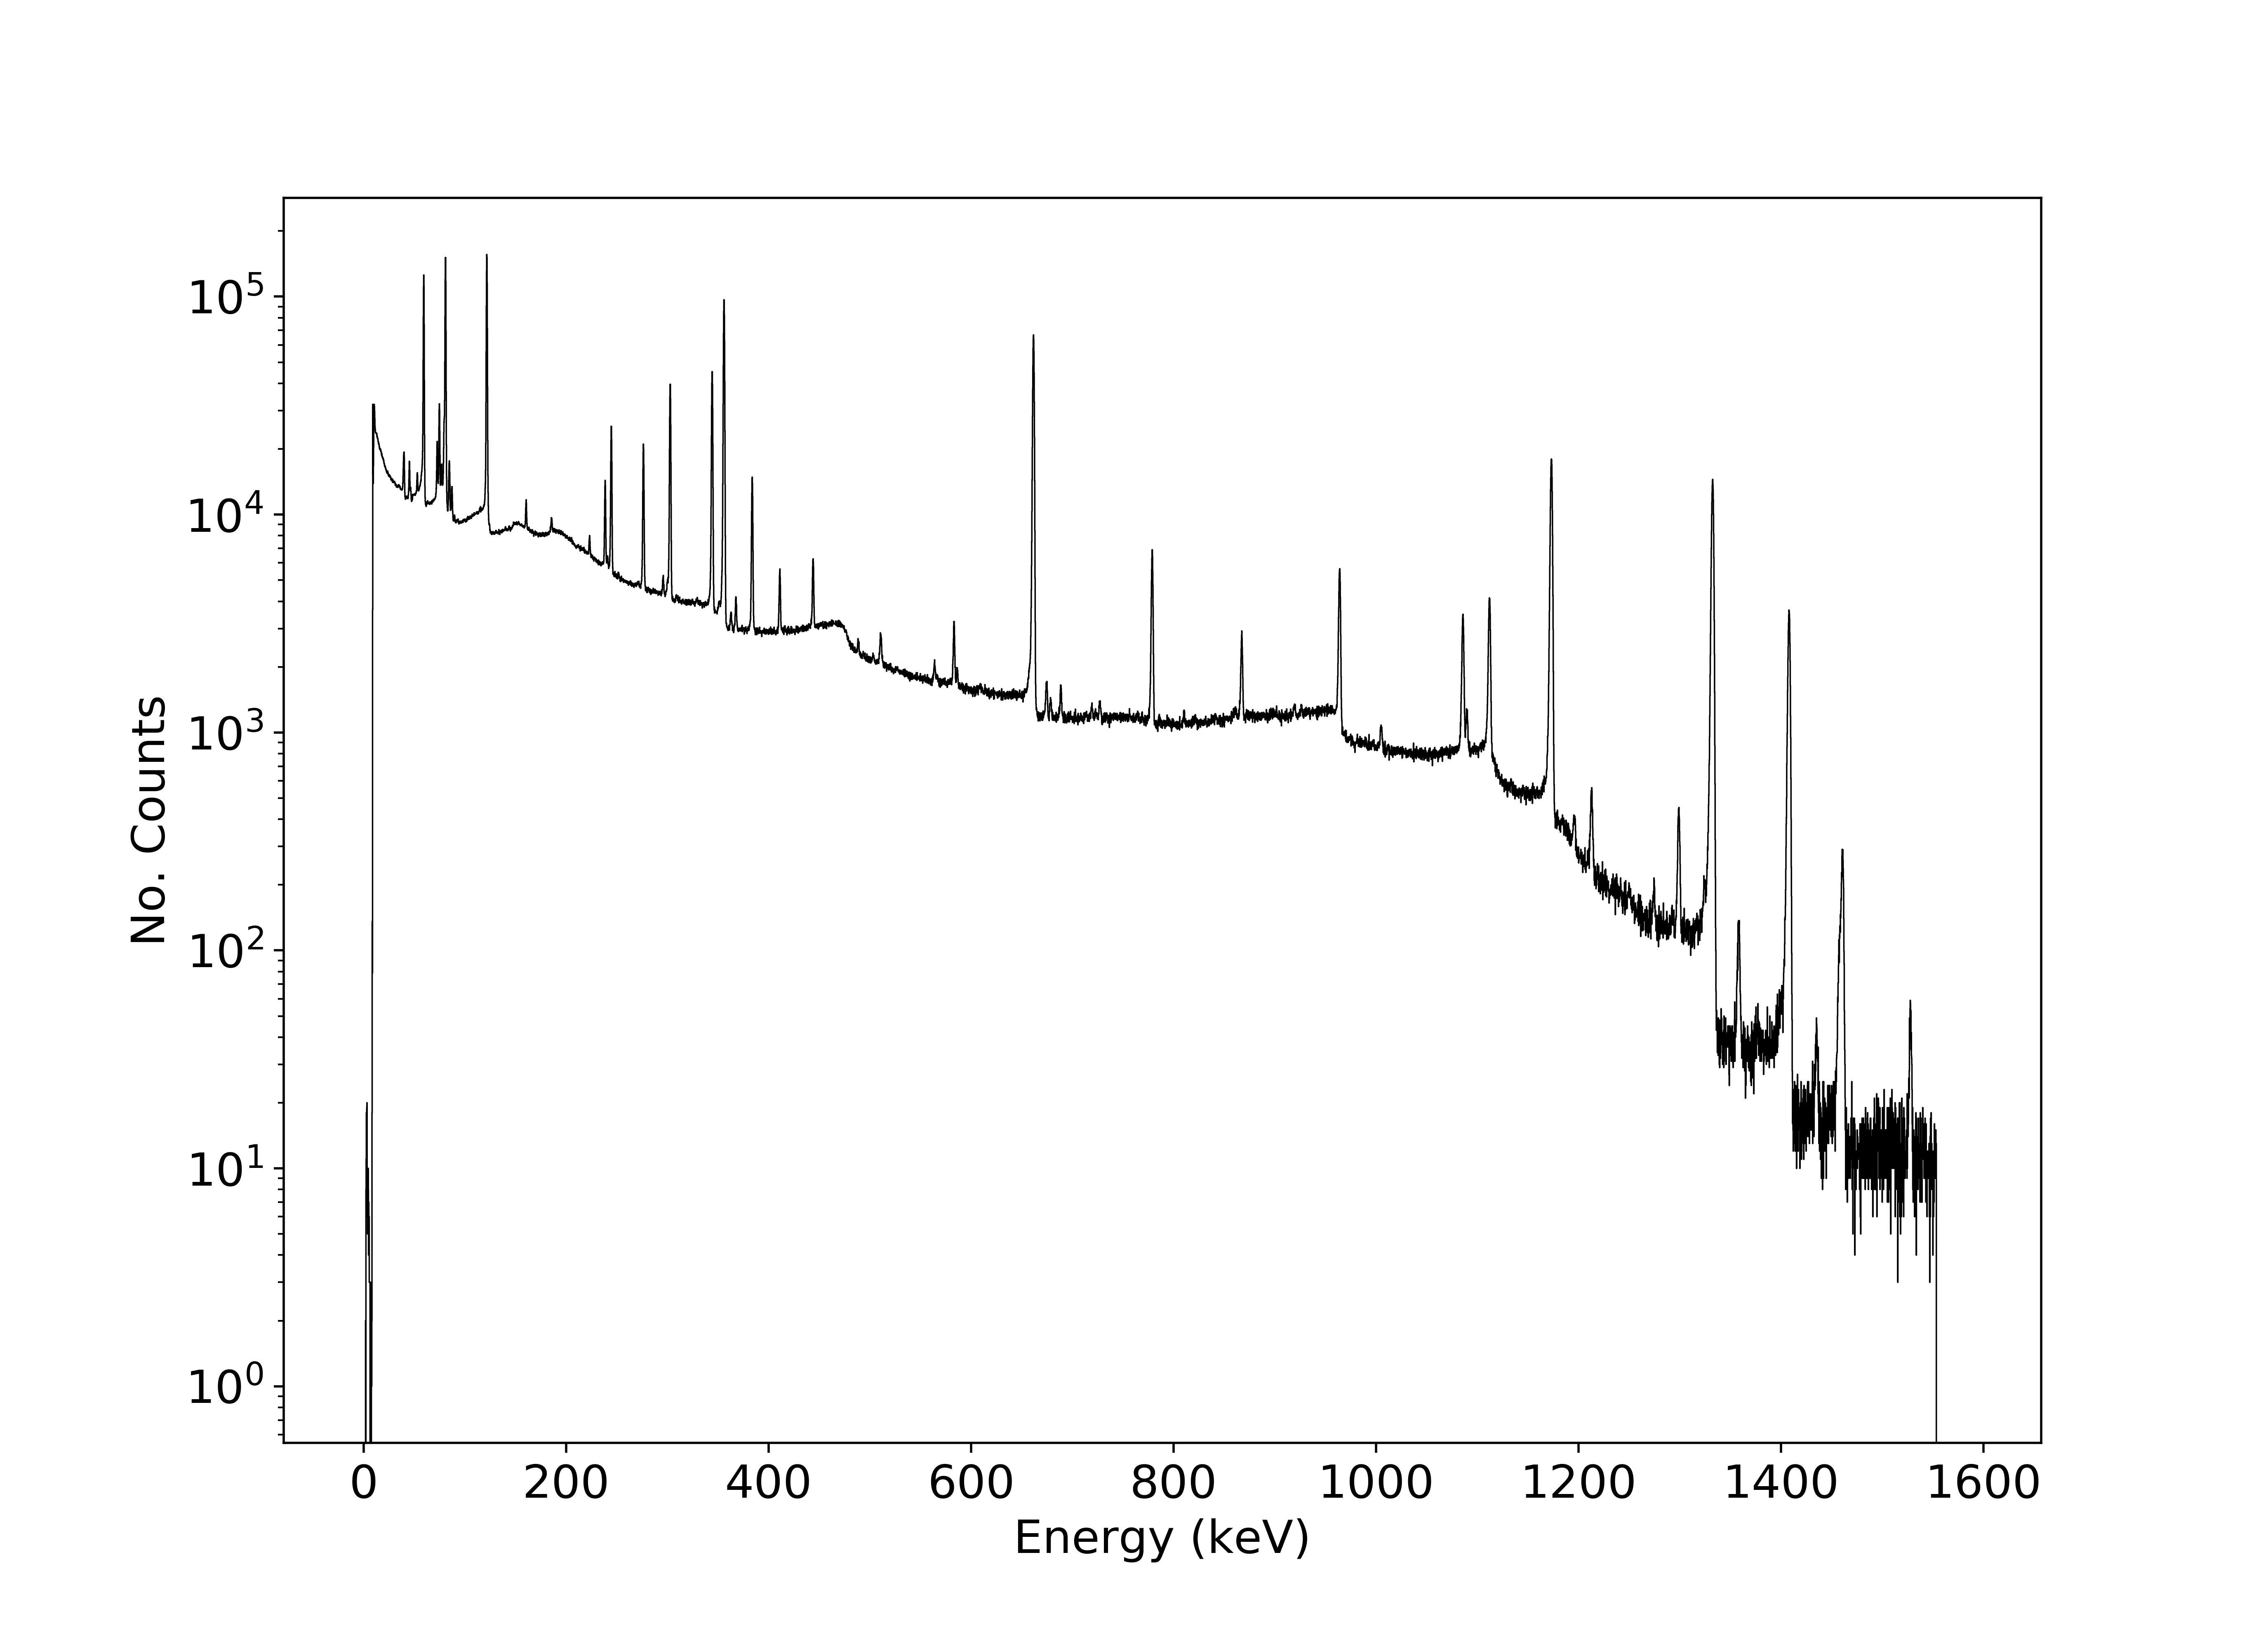

<Figure size 792x576 with 0 Axes>

In [6]:
#Obtain the energy calibration
centroids = []
centroids_unc = []
for i in range(0,len(windows)):
    if( n_peaks[i] == 1 ):
        centroids.append( fits[i][1] )
        centroids_unc.append( fits_cov[i][1,1] )
    elif( n_peaks[i] == 2 ):
        centroids.append( fits[i][1] )
        centroids_unc.append( fits_cov[i][1,1] )
    elif( n_peaks[i] == 3 ):
        centroids.append( fits[i][9] )
        centroids_unc.append( fits_cov[i][9,9] )

B_eng = energy_cal_fit( centroids, energies )
B_eng_cov = energy_cal_fit_cov( centroids, energies, centroids_unc, energies_unc )


#Plot the calibrated spectrum
plot_spectrum(data, display=False, energy_cal_in=B_eng, file_out='../images/spectrum.eps', logscale=True)
plot_spectrum(data, display=False, energy_cal_in=B_eng, file_out='../images/spectrum.png', fmt='png', logscale=True)
Image('../images/spectrum.png')

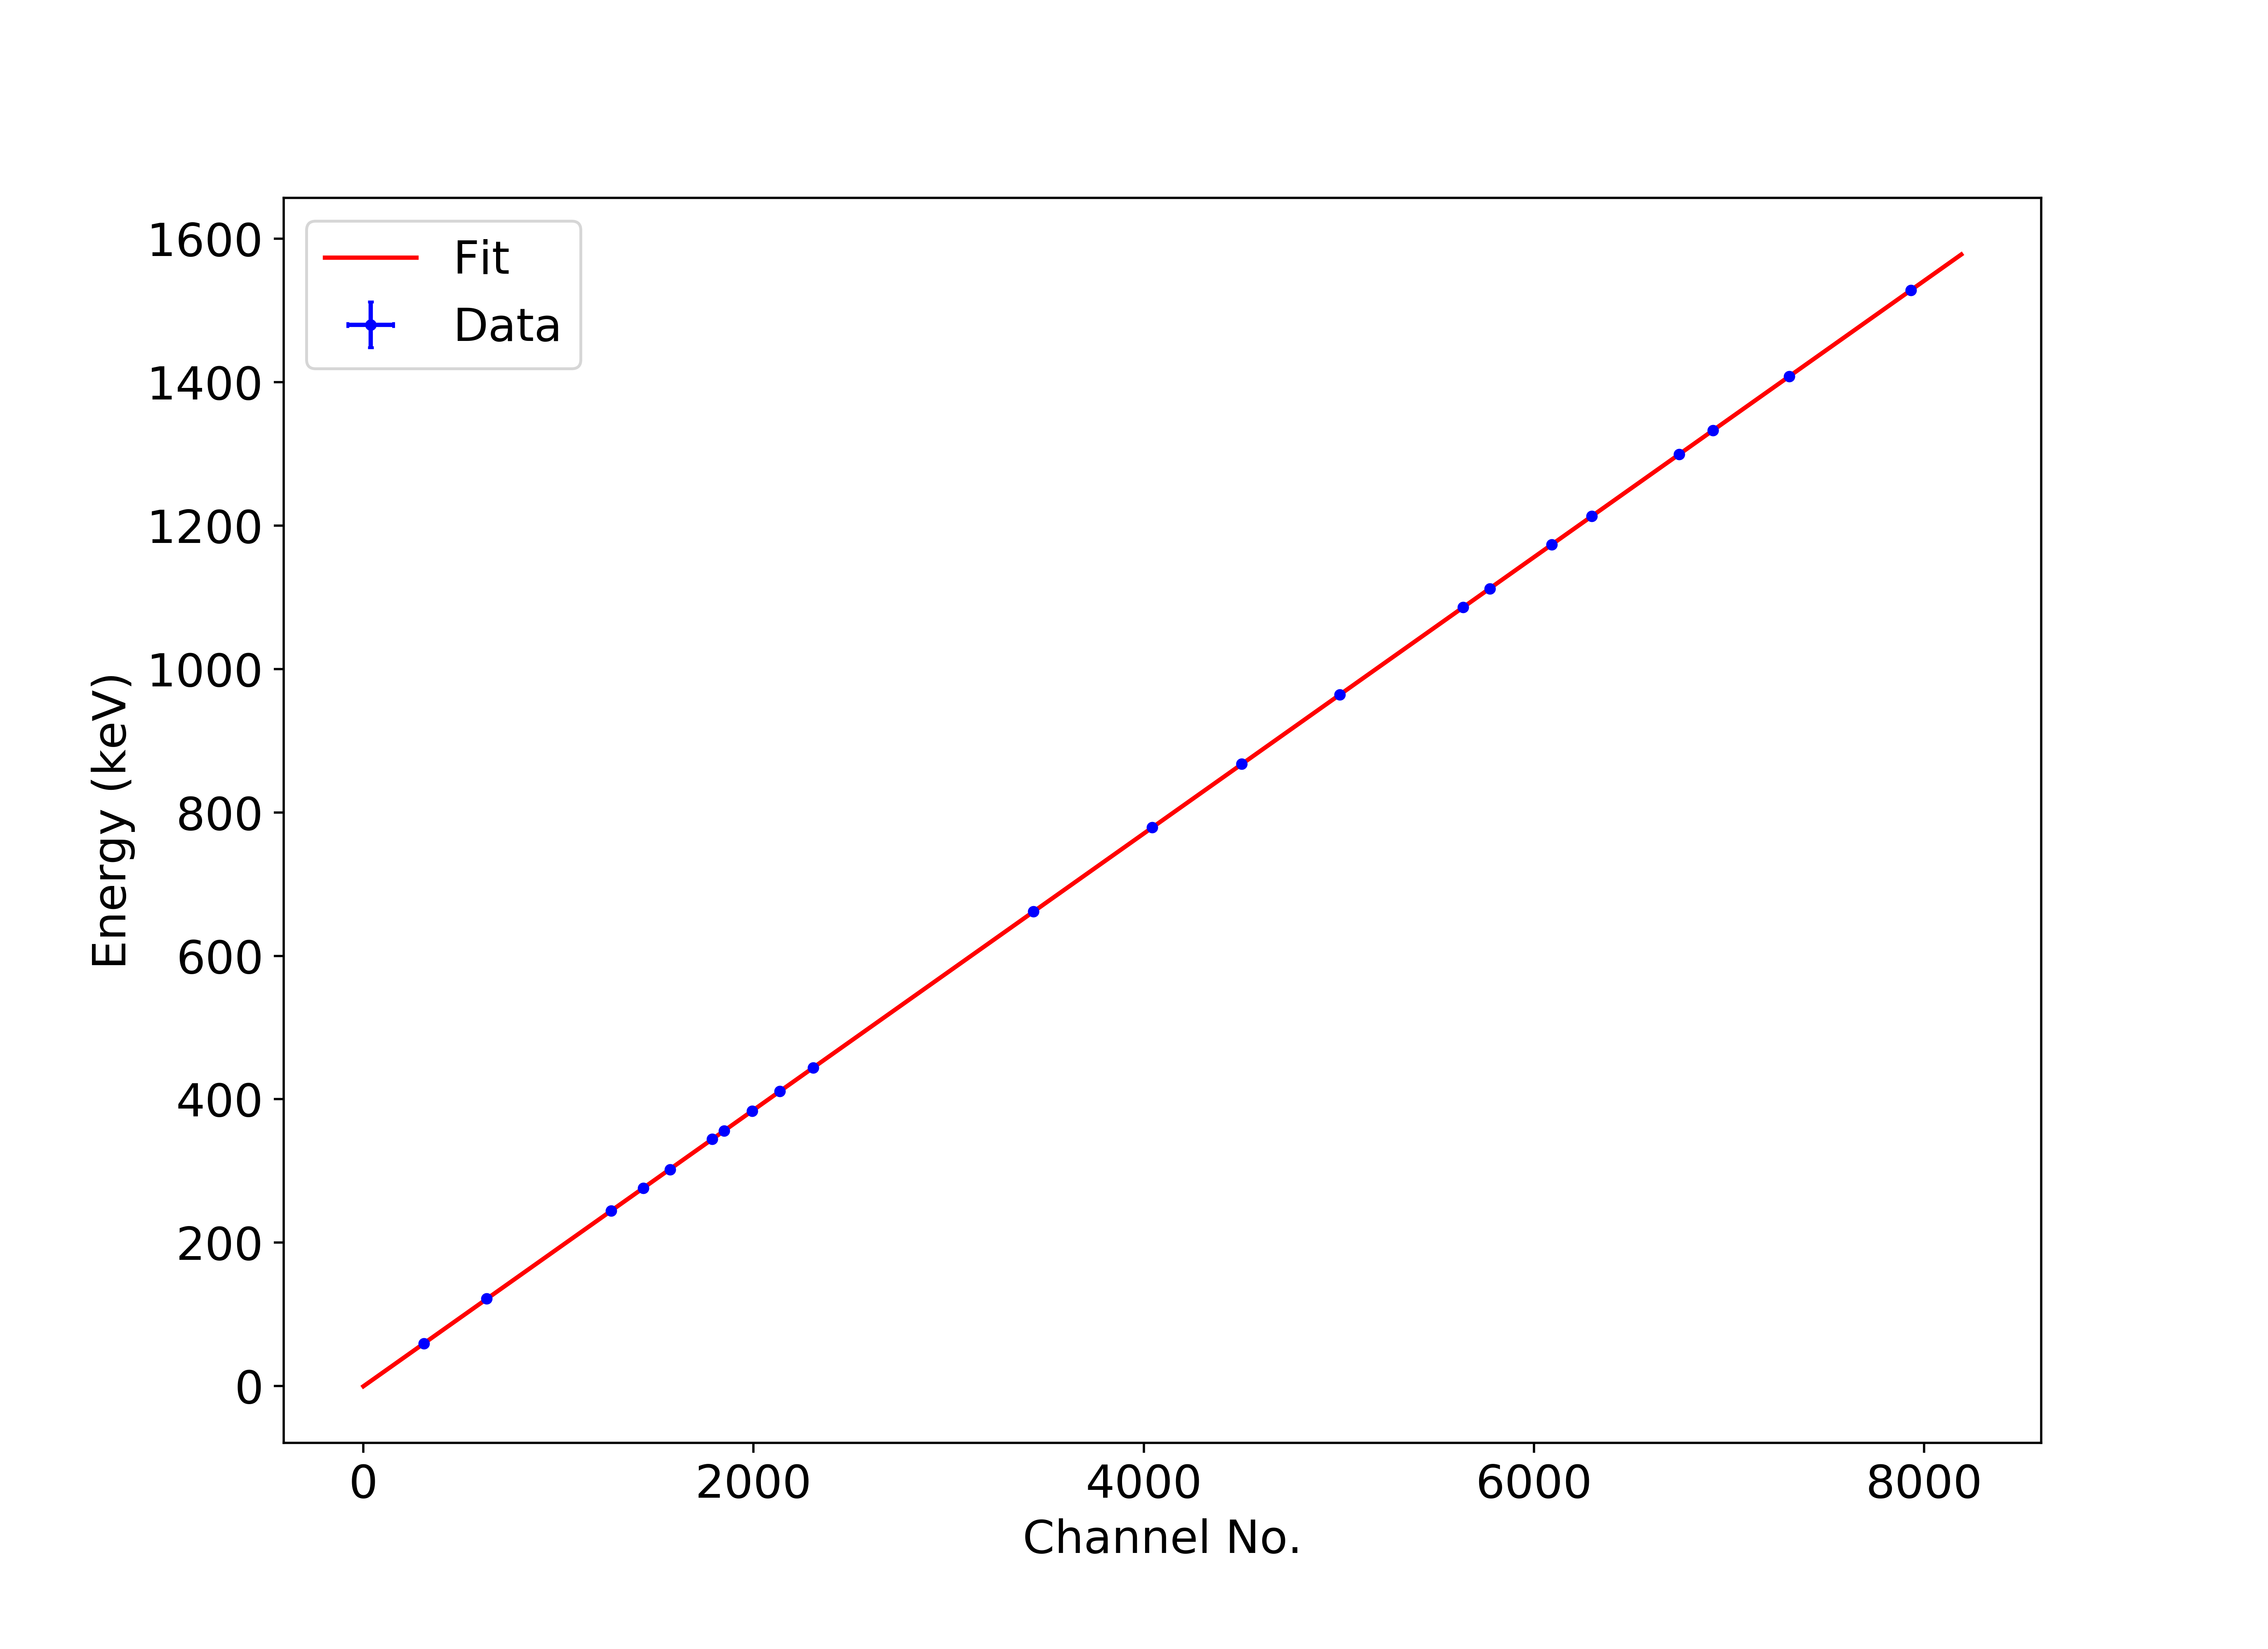

<Figure size 792x576 with 0 Axes>

In [7]:
#Plot the energy calibration
x_data = numpy.arange(0,8192)
y_data = energy_cal( x_data, *B_eng )
plt.plot( x_data, y_data, 'r', label='Fit' )
plt.errorbar( centroids, energies, xerr=centroids_unc, yerr=energies_unc, fmt='b.', capsize=1.0, label='Data' )
plt.xlabel('Channel No.')
plt.ylabel('Energy (keV)')
plt.legend()
plt.savefig('../images/energy_cal.png',dpi=500)
plt.savefig('../images/energy_cal.eps',format='eps')
plt.clf()
Image('../images/energy_cal.png')

Now obtain efficiency data points from the photopeak fits. The efficiency at a given gamma-ray energy, $E_{\gamma}$, is the ratio of the number of gamma-rays emitted by the source, $C_{exp}$, divided by the number of of gamma-rays detected, $C_{obs}$:

\begin{equation}
\varepsilon(E_{\gamma}) = \frac{C_{obs}}{C_{exp}}
\end{equation}

The number of gamma-rays emitted by the source, $C_{exp}$, can be calculated from the calibrated activity of the source: 

\begin{equation}
C_{exp} = I_{\gamma} R_{dead} \int_{t_0}^{t_1} A_0 e^{-\lambda t} dt
\end{equation}

\begin{equation}
C_{exp} = I_{\gamma} R_{dead} \times \Big[ -\frac{A_0 e^{-\lambda t}}{\lambda} \Big] _{t0}^{t1}
\end{equation}

\begin{equation}
C_{exp} = I_{\gamma} R_{dead} \frac{A_0}{\lambda} ( e^{-\lambda t_0} - e^{-\lambda t_1} )
\end{equation}

where $t_0$ is the time between the source calibration and the start of the count, $t_1$ is the time between the source calibration and the end of the count, $\lambda$ is the decay constant of the source, $A_0$ is the initial activity of the source at creation, $I_{\gamma}$ is the emission intensity of the gamma ray, and $R_{dead}$ is a dead time correction scalar. 

Calculate $C_{exp}$ and its uncertainty using the general error propagation formula for each source:

In [8]:
#Half-lives
#                        152Eu        241Am     60Co        137Cs         133Ba
halflives     = [ 13.157*365.0, 432.6*365.0, 1925.28, 30.08*365.0, 10.551*365.0 ] #days
halflives_unc = [  0.009*365.0,   0.6*365.0,    0.14,  0.09*365.0,  0.011*365.0 ] #days
#Convert to seconds
for i in range(0,5):
    halflives[i] = halflives[i] * 24.0 * 60.0 * 60.0
    halflives_unc[i] = halflives_unc[i] * 24.0 * 60.0 * 60.0

    
#Start times
t0s     = [ 2493.15198, 3085.15198, 2050.15198, 2050.15198, 2493.15198 ] #days
#Convert to seconds
for i in range(0,5):
    t0s[i] = t0s[i] * 24.0 * 60.0 * 60.0


#End times
t1s = [] #seconds
for i in range(0,5):
    t1s.append( t0s[i] + 240369.0 )


#Dead time correction
R_dead = 240369.0 / 239378.0  #real time / live time


#Initial activities
#            152Eu   241Am    60Co   137Cs   133Ba
A0s     = [ 352720, 370000, 389200, 377400, 391100 ] #Bq
A0s_unc = [     40,   4000,    400,    400,    400 ] #Bq


#Gamma intensities
#                  241Am     152Eu     152Eu     133Ba     133Ba     152Eu     133Ba     133Ba     152Eu     152Eu    137Cs     152Eu    152Eu    152Eu     152Eu     152Eu      60Co     152Eu     152Eu      60Co     152Eu    152Eu
#                59.5409  121.7817  244.6974  276.3989  302.0129  344.2785  356.0192  383.8485  411.1165  443.9606  661.657  778.9045  867.380  964.057  1085.837  1112.076  1173.228  1212.948  1299.142  1332.492  1408.013  1528.10
intensities     = [ 35.9,    28.53,     7.55,     7.16,    18.34,    26.59,    62.05,     8.94,    2.237,    2.827,   85.10,    12.93,    4.23,   14.51,    10.11,    13.67,    99.85,    1.415,    1.633,  99.9826,    20.87,   0.279 ]
intensities_unc = [  0.4,     0.16,     0.04,     0.05,     0.13,     0.20,     0.0 ,     0.06,    0.013,    0.014,    0.20,     0.08,    0.03,    0.07,     0.05,     0.08,     0.03,    0.008,    0.011,   0.0006,     0.09,   0.003 ]
#Normalize
for i in range(0,len(windows)):
    intensities[i] = intensities[i] / 100.0
    intensities_unc[i] = intensities_unc[i] / 100.0


#Source No.
source_no       = [    1,        0,        0,        4,        4,        0,        4,        4,        0,        0,       3,        0,       0,       0,        0,        0,        2,        0,        0,        2,        0,       0 ]


#Expected counts
C_exps = []
C_exps_unc = []
for i in range(0,len(windows)):
    C_exp = intensities[i] * R_dead * A0s[source_no[i]] / (ln(2.0)/halflives[source_no[i]]) * ( exp(-ln(2.0)/halflives[source_no[i]] * t0s[source_no[i]]) - exp(-ln(2.0)/halflives[source_no[i]] * t1s[source_no[i]]) )
    C_exp_unc = 0.0
    C_exp_unc += ( intensities_unc[i] * R_dead * A0s[source_no[i]] / (ln(2.0)/halflives[source_no[i]]) * ( exp(-ln(2.0)/halflives[source_no[i]] * t0s[source_no[i]]) - exp(-ln(2.0)/halflives[source_no[i]] * t1s[source_no[i]]) ) )**2.0
    C_exp_unc += ( A0s_unc[source_no[i]] * intensities[i] * R_dead / (ln(2.0)/halflives[source_no[i]]) * ( exp(-ln(2.0)/halflives[source_no[i]] * t0s[source_no[i]]) - exp(-ln(2.0)/halflives[source_no[i]] * t1s[source_no[i]]) ) )**2.0
    K = intensities[i] * R_dead * A0s[source_no[i]]
    y = ln(2.0)/halflives[source_no[i]]
    C_exp_unc += ( (halflives_unc[source_no[i]]/halflives[source_no[i]] * y) * K * ( (t1s[source_no[i]]*exp(-y*t1s[source_no[i]]) - t0s[source_no[i]]*exp(-y*t0s[source_no[i]]))/y - (exp(-y*t1s[source_no[i]]) - exp(-y*t0s[source_no[i]]))/y**2.0 ) )**2.0
    C_exp_unc = sqrt( C_exp_unc )
    C_exps.append( C_exp )
    C_exps_unc.append( C_exp_unc )

Now calculate the efficiencies:

In [9]:
efficiencies = []
efficiencies_unc = []
for i in range(0,len(windows)):
    efficiencies.append( nets[i] / C_exps[i] )
    efficiencies_unc.append( (nets[i] / C_exps[i]) * sqrt( (nets_unc[i]/nets[i])**2.0 + (C_exps_unc[i]/C_exps[i])**2.0 ) )